In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
text_data= pd.read_csv("C:\\Users\\snmuj\\Downloads\\GenSim-Topic-Modeling-main\\GenSim-Topic-Modeling-main\\woman-opinion.csv")
print(text_data.head(2))
print(len(text_data))

   Id                                               Text
0   1  كتابته عن المرأة واللغة نموذجاً لتوضيح كتاب ال...
1   2  بالاضافة الى ذلك تحتاج المرأة وخاصة الشابة وال...
17883


In [3]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snmuj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
text_data.dropna(axis = 0, how ='any',inplace=True) 
text_data['Text'] = text_data['Text'].apply(clean_text)
text_data['Num_words_text'] = text_data['Text'].apply(lambda x:len(str(x).split())) 
print(len(text_data))
max_text_data_sentence_length  = text_data['Num_words_text'].max()
mask = (text_data['Num_words_text'] < 100) & (text_data['Num_words_text'] >=20)

17883


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('function-ar')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
text_data['Text']=text_data['Text'].apply(remove_stopwords)

In [7]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [8]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
import spacy
spacy.load("en_core_web_sm")

import spacy
spacy.load("xx_ent_wiki_sm")

import xx_ent_wiki_sm
nlp = xx_ent_wiki_sm.load()

In [11]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB']):
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:
text_list=text_data['Text'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

بالاضافة تحتاج المرأة وخاصة الشابة والارضية واضطلاع المرأة الامر المرأة والوزارة تتجاوب
['والارضية']


### Create vocabulary dictionary and document term matrix

In [13]:
dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [15]:
lda_model.print_topics()

[(0,
  '0.030*"الله" + 0.013*"حقوق" + 0.013*"نتيجة" + 0.012*"علاقة" + 0.009*"الجمال" + 0.009*"كلمة" + 0.008*"العدد" + 0.008*"حرية" + 0.006*"بالرجال" + 0.006*"كتابة"'),
 (1,
  '0.028*"مشاركة" + 0.019*"بينما" + 0.008*"معاناة" + 0.007*"تعليم" + 0.007*"الوزن" + 0.007*"أماكن" + 0.006*"واقع" + 0.006*"كثيرة" + 0.006*"العقم" + 0.006*"ثقافة"'),
 (2,
  '0.045*"الشعر" + 0.042*"المسلمة" + 0.015*"اليوم" + 0.012*"تقوم" + 0.008*"الإسلام" + 0.008*"ممارسة" + 0.008*"خصوصاً" + 0.007*"تشعر" + 0.007*"عبدالعزيز" + 0.006*"الرياضة"'),
 (3,
  '0.016*"المملكة" + 0.010*"فترة" + 0.010*"محمد" + 0.010*"الرياض" + 0.008*"أمام" + 0.007*"دراسة" + 0.007*"الشيخ" + 0.007*"وحقوق" + 0.007*"نفسها" + 0.007*"أنواع"'),
 (4,
  '0.023*"وجود" + 0.016*"أقول" + 0.011*"الدم" + 0.009*"لحقوق" + 0.009*"جديدة" + 0.009*"نساء" + 0.008*"امرأة" + 0.007*"كثيرا" + 0.007*"الأول" + 0.007*"يتعلق"'),
 (5,
  '0.048*"الرجل" + 0.014*"بأنها" + 0.013*"يقول" + 0.011*"الشباب" + 0.009*"طريق" + 0.008*"رؤية" + 0.008*"السعوديات" + 0.007*"والأطفال" + 0.006*"ت

In [16]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.370039 -0.023906       1        1  21.272068
8      0.069048 -0.320501       2        1  11.785408
3      0.034859  0.059491       3        1  11.408176
2      0.052858  0.037969       4        1  10.174754
7      0.044120  0.053856       5        1   8.875630
4      0.046300  0.039824       6        1   8.869452
9      0.037062  0.053341       7        1   8.413123
1      0.037604  0.036074       8        1   6.528718
0      0.046415  0.034417       9        1   6.496533
5      0.001772  0.029433      10        1   6.176139, topic_info=         Term         Freq        Total Category  logprob  loglift
9      المرأة  3411.000000  3411.000000  Default  30.0000  30.0000
520    النساء  1933.000000  1933.000000  Default  29.0000  29.0000
3       الرجل   485.000000   485.000000  Default  28.0000  28.0000
172     الشعر   306.000000   306.000000  Default  27.0000  27.0000
5     المسلمة   284.000000   284.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
3513    الألم    13.888061    14.686841  Topic10  -5.6831   2.7286
3658    والحب    12.834788    13.633565  Topic10  -5.7620   2.7241
9457    وبناء    12.706600    13.505330  Topic10  -5.7720   2.7235
3       الرجل   196.053850   485.366715  Topic10  -3.0357   1.8780
221    بالرجل    14.257454    38.069379  Topic10  -5.6568   1.8023

[358 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2191      5  0.993804  أثناء
6747      5  0.976504  أجريت
1901      9  0.957097   أجمل
476       2  0.989122   أحمد
5330      6  0.954948  أسباب
...     ...       ...    ...
1497      4  0.959988   يقال
4879      2  0.961449   يقدم
414      10  0.977982   يقول
1544     10  0.956720   ينظر
1196      3  0.986985   يوجد

[341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 4, 3, 8, 5, 10, 2, 1, 6])

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.376043424482726

Coherence Score:  0.585338085844936


### Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore


In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=1, limit=11, step=1)

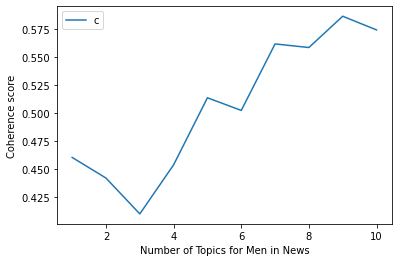

In [20]:
#Print the coherence scores
# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics for Men in News")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() 

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4606
Num Topics = 2  has Coherence Value of 0.4422
Num Topics = 3  has Coherence Value of 0.4102
Num Topics = 4  has Coherence Value of 0.454
Num Topics = 5  has Coherence Value of 0.5138
Num Topics = 6  has Coherence Value of 0.5025
Num Topics = 7  has Coherence Value of 0.5619
Num Topics = 8  has Coherence Value of 0.5586
Num Topics = 9  has Coherence Value of 0.5865
Num Topics = 10  has Coherence Value of 0.5743


In [22]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.047*"المرأة" + 0.029*"المسلمة" + 0.023*"السعودية" + 0.016*"مشاركة" + 0.013*"بعنوان" + 0.012*"نسبة" + 0.011*"الدم" + 0.010*"المملكة" + 0.009*"نفسه" + 0.009*"الرجل"'),
 (1,
  '0.023*"المرأة" + 0.014*"أمام" + 0.013*"تناول" + 0.013*"الناس" + 0.012*"بينما" + 0.012*"الرجل" + 0.010*"الأكثر" + 0.009*"يقول" + 0.009*"علاج" + 0.009*"الإسلام"'),
 (2,
  '0.017*"الرياض" + 0.014*"الأطفال" + 0.013*"ثقافة" + 0.011*"تقوم" + 0.011*"الجمال" + 0.009*"السعوديات" + 0.009*"الرياضة" + 0.009*"يعرف" + 0.008*"والولادة" + 0.008*"اليوم"'),
 (3,
  '0.027*"أثناء" + 0.017*"الأم" + 0.016*"الحب" + 0.012*"نتيجة" + 0.011*"الحمل" + 0.009*"الواقع" + 0.009*"سنوات" + 0.008*"الجديد" + 0.008*"النساء" + 0.008*"لحقوق"'),
 (4,
  '0.270*"النساء" + 0.014*"الله" + 0.010*"كبيرة" + 0.009*"الآخر" + 0.007*"الرجال" + 0.007*"المملكة" + 0.006*"خصوصاً" + 0.006*"مقارنة" + 0.006*"الدين" + 0.006*"سرطان"'),
 (5,
  '0.065*"الرجل" + 0.060*"المرأة" + 0.018*"الشورى" + 0.012*"واقع" + 0.012*"العالم" + 0.009*"السعودية" + 0.009*"تعالى" + 0.008

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.370039 -0.023906       1        1  21.268336
8      0.069048 -0.320501       2        1  11.785412
3      0.034859  0.059491       3        1  11.410494
2      0.052858  0.037969       4        1  10.174748
7      0.044120  0.053856       5        1   8.875631
4      0.046300  0.039824       6        1   8.869454
9      0.037062  0.053341       7        1   8.413123
1      0.037604  0.036074       8        1   6.530132
0      0.046415  0.034417       9        1   6.496540
5      0.001772  0.029433      10        1   6.176130, topic_info=         Term         Freq        Total Category  logprob  loglift
9      المرأة  3411.000000  3411.000000  Default  30.0000  30.0000
520    النساء  1933.000000  1933.000000  Default  29.0000  29.0000
3       الرجل   485.000000   485.000000  Default  28.0000  28.0000
172     الشعر   306.000000   306.000000  Default  27.0000  27.0000
5     المسلمة   284.000000   284.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
3513    الألم    13.888040    14.686840  Topic10  -5.6831   2.7286
3658    والحب    12.834769    13.633566  Topic10  -5.7620   2.7241
9457    وبناء    12.706581    13.505332  Topic10  -5.7720   2.7235
3       الرجل   196.053561   485.315821  Topic10  -3.0357   1.8781
221    بالرجل    14.257433    38.065340  Topic10  -5.6568   1.8025

[358 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2191      5  0.993803  أثناء
6747      5  0.976503  أجريت
1901      9  0.957095   أجمل
476       2  0.989121   أحمد
5330      6  0.954947  أسباب
...     ...       ...    ...
1497      4  0.959988   يقال
4879      2  0.961448   يقدم
414      10  0.977983   يقول
1544     10  0.956720   ينظر
1196      3  0.986788   يوجد

[341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 4, 3, 8, 5, 10, 2, 1, 6])